In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)


In [10]:
# Check the columns
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [11]:
# Check the columns
print(df.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [12]:
# Identify missing values
print(df.isnull().sum())

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64


## 1. Filter Countries of Interest

In [13]:
# Filter for specific countries
countries_of_interest = ['Kenya', 'United States', 'India']
filtered_df = df[df['location'].isin(countries_of_interest)]

## 2. Drop Rows with Missing Values

In [14]:
# Drop rows with missing dates or critical values
cleaned_df = filtered_df.dropna(subset=['date', 'total_cases', 'total_deaths'])



## 3. Convert Date Column to Datetime

In [15]:
# Convert date column to datetime
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])


C:\Users\User\AppData\Local\Temp\ipykernel_27168\1284966207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])


## 4. Handle Missing Numeric Values

In [16]:
# Fill missing numeric values
cleaned_df['total_cases'] = cleaned_df['total_cases'].fillna(0)
cleaned_df['total_deaths'] = cleaned_df['total_deaths'].fillna(0)


C:\Users\User\AppData\Local\Temp\ipykernel_27168\230438976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['total_cases'] = cleaned_df['total_cases'].fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_27168\230438976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['total_deaths'] = cleaned_df['total_deaths'].fillna(0)


# Exploratory Data Analysis (EDA)

In [17]:
# Set the style
sns.set(style="whitegrid")

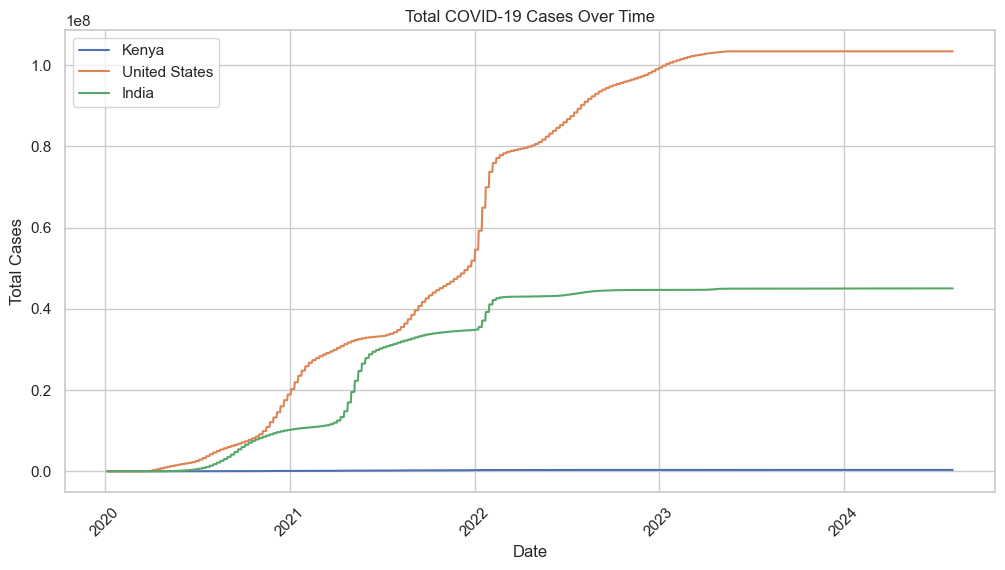

In [18]:
# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

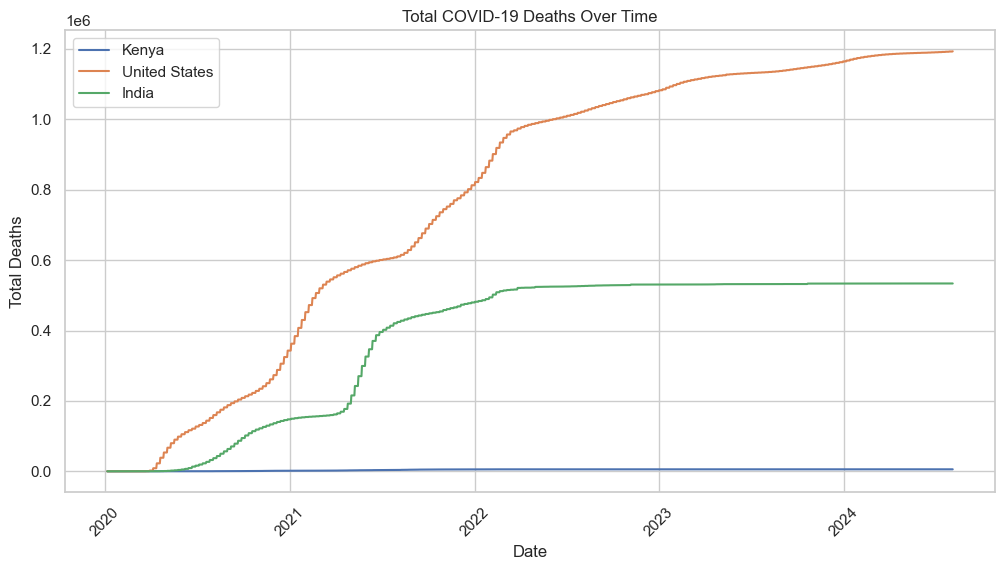

In [19]:
# Plot total deaths over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.xticks(rotation=45)
plt.show()

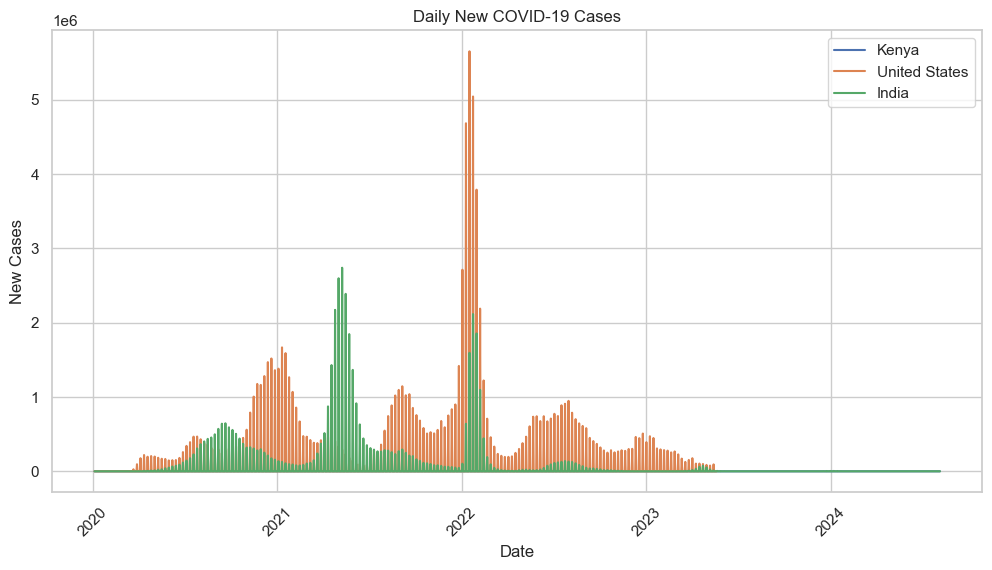

In [20]:
# Plot daily new cases
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [21]:
# Calculate death rate
cleaned_df['death_rate'] = cleaned_df['total_deaths'] / cleaned_df['total_cases']
print(cleaned_df[['location', 'date', 'death_rate']].head())


       location       date  death_rate
173549    India 2020-01-05         NaN
173550    India 2020-01-06         NaN
173551    India 2020-01-07         NaN
173552    India 2020-01-08         NaN
173553    India 2020-01-09         NaN


C:\Users\User\AppData\Local\Temp\ipykernel_27168\2508666647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['death_rate'] = cleaned_df['total_deaths'] / cleaned_df['total_cases']


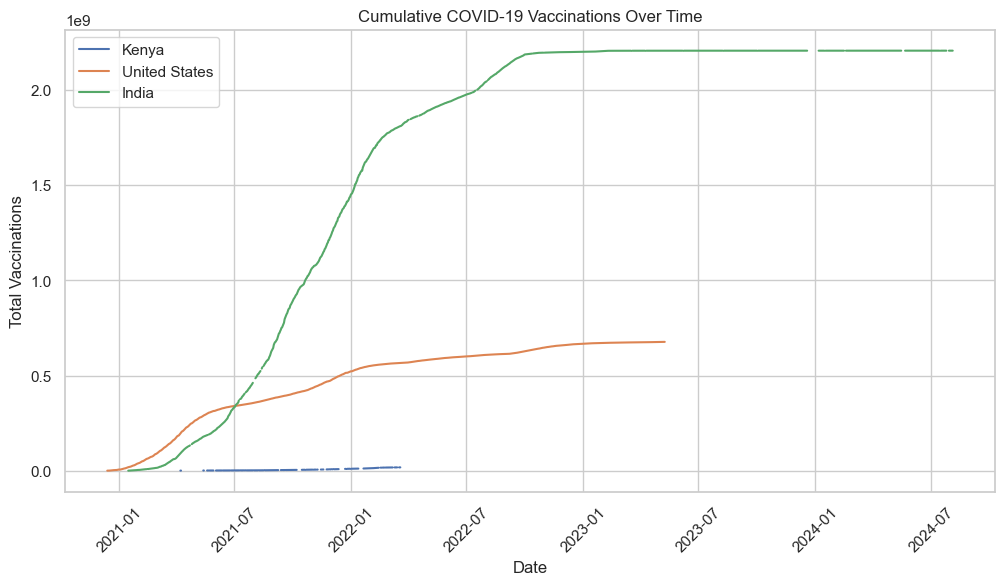

In [22]:
# Plot cumulative vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = cleaned_df[cleaned_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [23]:
import plotly.express as px

# Prepare a dataframe with iso_code and total_cases for the latest date
latest_data = cleaned_df[cleaned_df['date'] == cleaned_df['date'].max()]
fig = px.choropleth(latest_data, 
                    locations='iso_code', 
                    locationmode='ISO-3', 
                    color='total_cases',
                    hover_name='location',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.update_layout(title_text='COVID-19 Total Cases by Country')
fig.show()
